## Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [ ]:
df.drop(columns=["Unnamed: 0", "year", "month"], axis = 1, inplace=True)

In [8]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [10]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

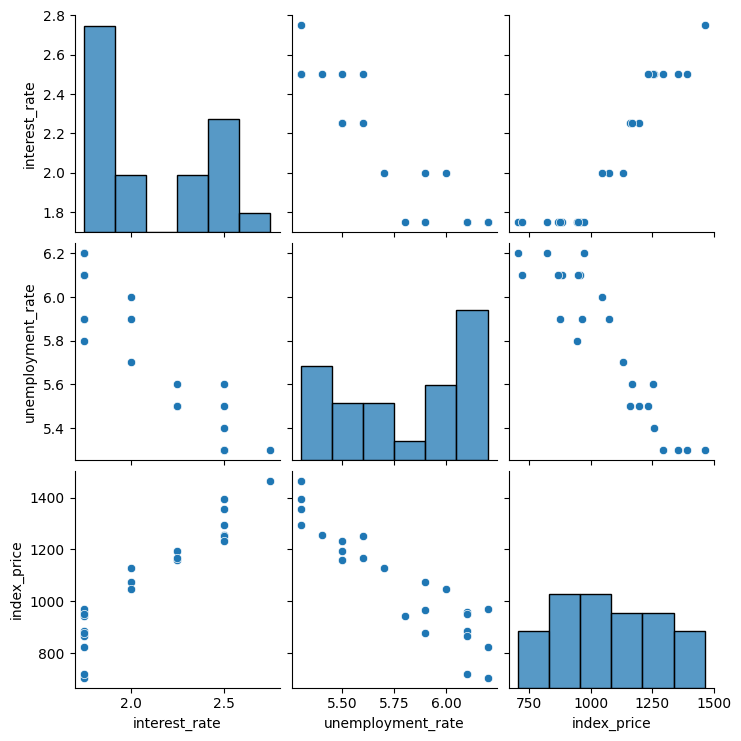

In [13]:
sns.pairplot(df);

In [14]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


### New Way using `.iloc()` to split into **X** and **Y**

In [20]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [21]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [22]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.25, random_state=42)

### New **Regression Plot** in *Seaborn* `sns.regplot()`

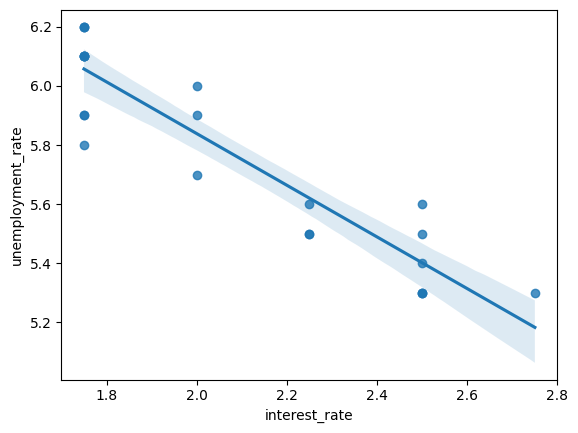

In [26]:
sns.regplot(x="interest_rate", y="unemployment_rate", data=df);

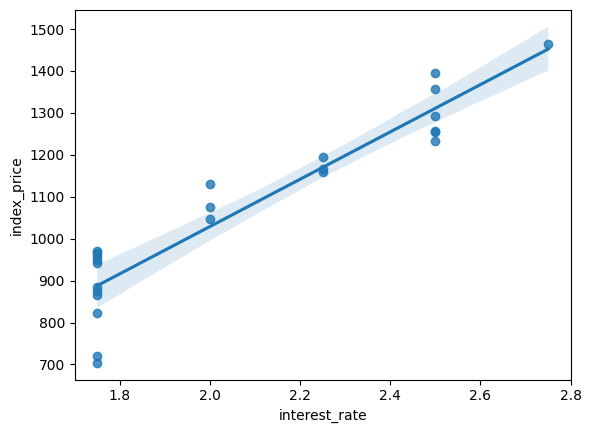

In [27]:
sns.regplot(x="interest_rate", y="index_price", data=df);

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_Train = scaler.fit_transform(X_Train)
X_Test = scaler.transform(X_Test)

In [29]:
X_Train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [30]:
X_Test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [31]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_Train,Y_Train)

LinearRegression()

### *Cross Validation*

In [37]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_Train,Y_Train,scoring = "neg_mean_squared_error", cv = 5)

In [40]:
Y_Pred = regression.predict(X_Test)

In [41]:
print(np.mean(validation_score))

-5649.115244350757


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(Y_Test, Y_Pred)
mae = mean_absolute_error(Y_Test, Y_Pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error is {mse}")
print(f"Root Mean Squared Error is {rmse}")
print(f"Mean Absolute Error is {mae}")

Mean Squared Error is 5793.762887712569
Root Mean Squared Error is 76.11677139574805
Mean Absolute Error is 59.935781523235484


In [44]:
from sklearn.metrics import r2_score
score = r2_score(Y_Test, Y_Pred)
print(score)

0.8278978091457145


### Plotting Graphs between `Y_test` and `Y_Pred`

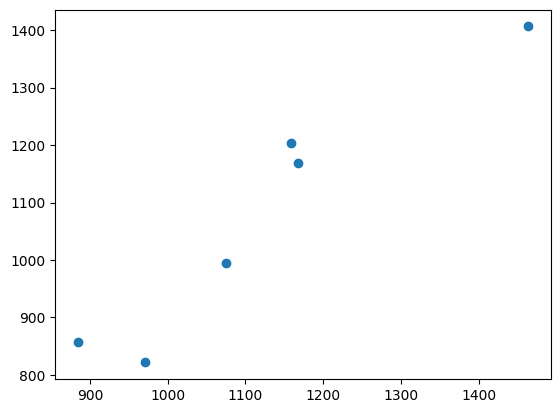

In [46]:
plt.scatter(Y_Test, Y_Pred);

In [48]:
residuals = Y_Test-Y_Pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


### `sns.displot()`, if it comes out to be a **Normal distribution** then your model is a ***good fit***

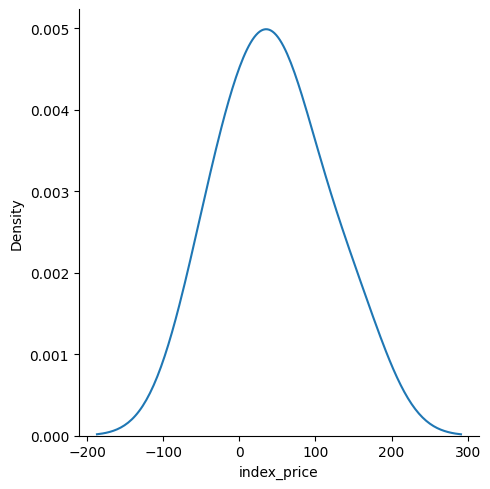

In [51]:
sns.displot(residuals, kind = "kde")

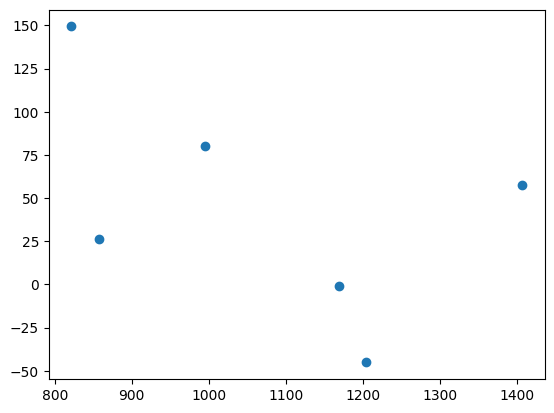

In [55]:
plt.scatter(Y_Pred, residuals);

### Since there is **No distribution** that is followed (*Uniform distribution*), we can assume that our model was a ***good fit***

In [56]:
import statsmodels.api as sm
model = sm.OLS(Y_Train, X_Train).fit()

In [57]:
model.summary()

c:\Udemy-Data-Science-Krish-Naik\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 15 Jul 2024   Prob (F-statistic):                       0.754
Time:                        11:41:07   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
coeff = regression.coef_
intercept = regression.intercept_

print(f"coeff: {coeff}")
print(f"intercept: {intercept}")

coeff: [  88.27275507 -116.25716066]
intercept: 1053.4444444444443
